# Time Series Definitions, Performance Metrics and Cross-Validation
Yang Xi<br>
24 Aug, 2021

## White Noise

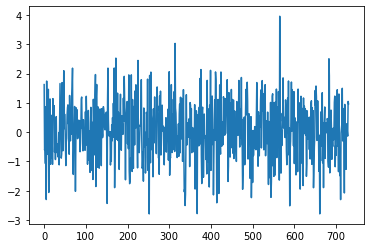

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)
n = 731
wn = np.random.normal(loc=0, scale=1, size=n)

plt.plot(wn)

## Autocorrelation Function (ACF)

### ACF of White Noise

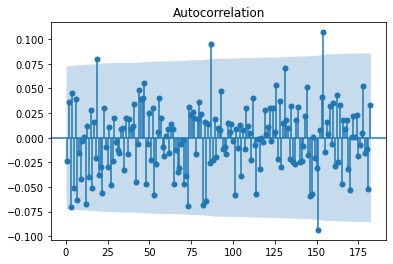

In [2]:
# For getting the acf values:
nlags = int(n/4)

from statsmodels.tsa.stattools import acf
arAcf = acf(wn, nlags=nlags, fft=False) # the acf values

from statsmodels.graphics.tsaplots import plot_acf
plotACF = plot_acf(wn, lags=nlags, fft=False, zero=False, alpha=0.05)

### ACF Manual Implementation
Reference: *https://otexts.com/fpp2/autocorrelation.html*

In [3]:
def GetACF(ts, nlags):
    y_bar = ts.mean()
    T = len(ts)
    denominator = np.array([(ts[t] - y_bar)**2 for t in range(0, T)]).sum()

    lNumerators = []
    for k in range(0, nlags+1):
        numerator = np.array([(ts[t] - y_bar)*(ts[t-k] - y_bar) for t in range(k, T)]).sum()
        lNumerators.append(numerator)
    
    return np.array(lNumerators) / denominator

GetACF(wn, nlags=3)


array([ 1.        , -0.02319501,  0.03576362, -0.07014265])

### ACF of Daily Sales Data

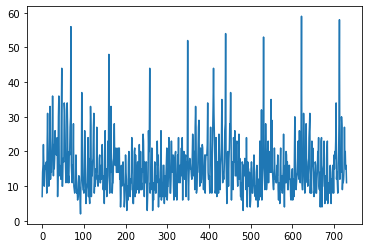

In [4]:
dfItemB = pd.read_csv('data/time_series_daily_B.csv')
seSalesB = dfItemB['sales_qty']

plt.plot(seSalesB)

The max ACF 0.41 occurs at 91 days of lag.


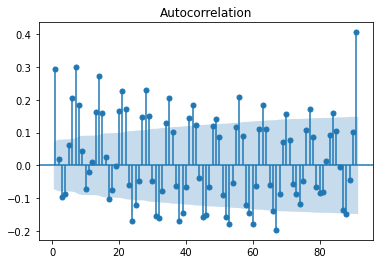

In [5]:
nlags = 91 # one quarter
arAcf = acf(seSalesB, nlags=nlags, fft=False) # the acf values
print(f"The max ACF {arAcf[1:].max():.2f} occurs at {arAcf[1:].argmax()+1} days of lag.")
plotACF = plot_acf(seSalesB, lags=nlags, fft=False, zero=False, alpha=0.05)

## Ljung-Box Test
**Null Hypothesis**: the data are independently distributed (white noise).

Note that by specifying a single lag value, the statistics already included all lags less than or equal to this lag value. See formulation in the next session.

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(f"Ljung-Box test for white noise:")
dfBox = acorr_ljungbox(wn, lags=[nlags], return_df=True)
dfBox

Ljung-Box test for white noise:


,lb_stat,lb_pvalue
91,86.776875,0.605797


### Formualtion (manual calculation)

Reference: *https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test*

In [7]:
from scipy.stats import chi2

def LjungBox(ts, lags):
    T = len(ts)
    y_bar = ts.mean()
    denominator = np.array([(ts[t] - y_bar)**2 for t in range(0, T)]).sum()

    lSum = []
    for k in range(1, lags+1):
        numerator = np.array([(ts[t] - y_bar)*(ts[t-k] - y_bar) for t in range(k, T)]).sum()
        cor_k = numerator/denominator
        lSum.append(cor_k**2 /(T-k))
    Q = T*(T+2) * np.array(lSum).sum()
    p = chi2.sf(Q, df=lags)
    return Q, p

Q, p = LjungBox(wn, lags=91)
print(f"Statistics = {Q}, p-value = {p}")

Statistics = 86.7768752312503, p-value = 0.6057969195211009


In [8]:
print(f"Ljung-Box test for daily sales data:")
dfBox = acorr_ljungbox(seSalesB, lags=[nlags], return_df=True)
dfBox

Ljung-Box test for daily sales data:


,lb_stat,lb_pvalue
91,1366.717329,1.387292e-226
